In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.feature_extraction.text import CountVectorizer

讀取的檔案，已經涵蓋了新聞的正負面屬性，今天我們希望找出每篇新聞的關鍵字  
因此除了要做結巴切詞之外，同時也希望得到tf-idf等等資訊  
不過再這之前，我們希望對新聞資訊做一些處理(處理亂碼、標點符號、停用詞等等)  
更進階一點，為了讓結巴切的準確一些，我們可以新增字典，讓結巴沒看過的詞彙也分的出來   

In [6]:
TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/LARGAN_Stock.csv')
# Foxconn_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/Foxconn_Stock.csv')
# TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/TSMC_Stock.csv')


TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/LARGAN_NEWS.csv')
# Foxconn_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/Foxconn_NEWS.csv')
# TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/TSMC_NEWS.csv')



In [7]:
LARGAN_NEWS

,TITLE,TIME,DESCRIPTION,CONTENT,year,month,day,hour,status
0,"台股守11,600點收跌32.93點 三大法人賣超27.11億",2019-12-10,"台股今(10)日開低震盪，一度下探至11,607.26點，台積電(2330)、大立光、鴻海齊...","台股今(10)日開低震盪，一度下探至11,607.26點，台積電(2330)、大立光、鴻海齊...",2019,12,10,0,0
1,玉晶光法說會將登場 法人關注三大焦點,2019-12-10,玉晶光（3406）今（10）日下午將召開法說會，預期法人將聚焦蘋果訂單、資本支出、及多鏡頭趨...,玉晶光（3406）今（10）日下午將召開法說會，預期法人將聚焦蘋果訂單、資本支出、及多鏡頭趨...,2019,12,10,0,0
2,台股小漲 記憶體族群強勢,2019-12-11,台股今天盤中小漲，蘋果概念股三王小幅開高，但面臨外資由買轉賣壓力，股價在平盤附近震盪，盤面焦...,台股今天盤中小漲，蘋果概念股三王小幅開高，但面臨外資由買轉賣壓力，股價在平盤附近震盪，盤面焦...,2019,12,11,0,0
3,十大營收成長股 外資力挺又買進,2019-12-10,上市櫃公司11月營收出爐。受到拉貨力道減弱，多數公司較10月表現下滑，但以單月營收和累計營收...,上市櫃公司11月營收出爐。受到拉貨力道減弱，多數公司較10月表現下滑，但以單月營收和累計營收...,2019,12,10,0,0
4,台指期 外資減碼多單,2019-12-10,"股期雙市昨（10）日震盪收黑，指數齊步守穩11,600點；分析師表示，現階段期現貨轉為逆價差...","股期雙市昨（10）日震盪收黑，指數齊步守穩11,600點；分析師表示，現階段期現貨轉為逆價差...",2019,12,10,0,0
...,...,...,...,...,...,...,...,...,...
2900,華為殺手級產品 挑戰三星,2018-10-03,市調機構IDC統計，今年第2季華為全球智慧手機出貨量市占率達15.8%，超越蘋果的12.1%...,市調機構IDC統計，今年第2季華為全球智慧手機出貨量市占率達15.8%，超越蘋果的12.1%...,2018,10,3,0,-1
2901,愈貴愈好賣 頂規iPhone出貨上調,2018-09-26,天風證券分析師郭明錤25日發布最新研究報告，上調iPhone XS Max出貨5%到10%，...,天風證券分析師郭明錤上修iPhone XS Max（右）下半年出貨量，並看好其銷售將優於iP...,2018,9,26,0,0
2902,果迷含金量高 iPhone XS系列開賣首周勝去年i8,2018-10-08,果迷再度證明，買高價iPhone不是問題。儘管今年蘋果新機價格天花板再度提升，大尺寸的Max...,果迷再度證明，買高價iPhone不是問題。儘管今年蘋果新機價格天花板再度提升，大尺寸的Max...,2018,10,8,0,0
2903,XS系列首周銷量 比i8增7%,2018-10-08,果迷再度證明，買高價iPhone不是問題。儘管今年蘋果新機價格天花板再度提升，大尺寸的Max...,法人表示，iPhone XS系列占據該周市占率為1.1%，優於去年開賣的iPhone 8、8...,2018,10,8,0,0


### 正則表達式把文章弄得好看一點

In [8]:
add_word_list = pd.read_table("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/Jieba自定義字典/Largan＿Dict.txt",header = None)
add_word_list.columns = ['vocab']
add_word_list = list(add_word_list['vocab'])
for i in add_word_list:
    jieba.add_word(i)
    

## 找出正面新聞的重要詞彙

In [9]:
upnews = TSMC_NEWS[TSMC_NEWS['status']==1]
allnews = TSMC_NEWS['CONTENT']
downnews = TSMC_NEWS[TSMC_NEWS['status']==-1]
   
positive_token = []
for goodnews in upnews['CONTENT']:
    goodnews = re.sub(r'[。，（）_?\d]','',goodnews)
    #這邊想再加一行過濾亂碼的條件，但是還沒搞懂
    seg_list = jieba.cut(goodnews)
    token = ' '.join(seg_list)
    positive_token.append(token)

count_vec_pos = CountVectorizer()
good_news_count = count_vec_pos.fit_transform(positive_token)
good_news_corpus = count_vec_pos.get_feature_names() 
good_news_count = pd.DataFrame(good_news_count.toarray(),columns = good_news_corpus)

#-----------------------------

all_token = []
for all_news in allnews:
    all_news = re.sub(r'[。，（）_?\d]','',all_news)
    seg_list = jieba.cut(all_news)
    token = ' '.join(seg_list)
    all_token.append(token)
   
count_vec_all_pos_vocab = CountVectorizer(vocabulary=good_news_corpus)
all_news_count_pos = count_vec_all_pos_vocab.fit_transform(all_token)
all_news_count_pos = pd.DataFrame(all_news_count_pos.toarray(),columns = good_news_corpus)
    
#-----------------------------

negative_token = []
for badnews in downnews['CONTENT']:
    badnews = re.sub(r'[。，（）_?\d]','',badnews)
    seg_list = jieba.cut(badnews)
    token = ' '.join(seg_list)
    negative_token.append(token)

count_vec_neg = CountVectorizer()
bad_news_count = count_vec_neg.fit_transform(negative_token)
bad_news_corpus = count_vec_neg.get_feature_names() 
bad_news_count = pd.DataFrame(bad_news_count.toarray(),columns = bad_news_corpus)

#-----------------------------
   
count_vec_all_neg_vocab = CountVectorizer(vocabulary=bad_news_corpus)
all_news_count_neg = count_vec_all_neg_vocab.fit_transform(all_token)
all_news_count_neg = pd.DataFrame(all_news_count_neg.toarray(),columns = bad_news_corpus)





### 待解決問題：
1.結巴不支援英文，是否用NLTK拉出來處理  
2.stopwords還沒時間搞  
3.組員切出來的自定義辭典不能用(貌似要加詞頻那些)  

In [10]:
all_news_count_pos

,abf,abs,adas,add,adp,adr,af,agoogle,ai,air,...,鼓勵,齊挫,齊揚,齊收,齊步,齊漲,齊發,齊跌,龍頭,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
all_news_count_neg

,aai,abf,acof,adas,adr,ag,agalaxy,agis,agoogle,ai,...,鼓勵,鼓舞,鼻青,齊揚,齊步,齊漲,齊聚,齡及,龍華,龍頭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 計算全部新聞和正面新聞的tf-idf / Chi-Square值

### Good news

In [12]:
allnews_tf_dictionary_pos = {}
allnews_df_dictionary_pos = {}


column_name = all_news_count_pos.columns

for i in column_name:
    allnews_tf_dictionary_pos[i] = all_news_count_pos.loc[:,i].sum()
    allnews_df_dictionary_pos[i] = np.count_nonzero(all_news_count_pos.loc[:,i])

all_news_pos_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_pos,orient='index',columns = ['tf_all_news'])
all_news_pos_df = pd.DataFrame.from_dict(allnews_df_dictionary_pos,orient='index',columns = ['df_all_news'])
all_news_pos = pd.concat([all_news_pos_tf,all_news_pos_df],axis = 1)
all_news_pos['tf-idf_all_news'] =(np.log(all_news_count_pos.shape[0])/all_news_pos['df_all_news'])* all_news_pos['tf_all_news']


pos_tf_dictionary = {}
pos_df_dictionary = {}

column_name = good_news_count.columns

for i in column_name:
    pos_tf_dictionary[i] = good_news_count.loc[:,i].sum()
    pos_df_dictionary[i] = np.count_nonzero(good_news_count.loc[:,i])

good_news_tf = pd.DataFrame.from_dict(pos_tf_dictionary,orient='index',columns = ['tf_good_news'])
good_news_df = pd.DataFrame.from_dict(pos_df_dictionary,orient='index',columns = ['df_good_news'])
good_news = pd.concat([good_news_tf,good_news_df],axis = 1)
good_news['tf-idf_good_news'] = (np.log(good_news_count.shape[0])/good_news['df_good_news'])* good_news['tf_good_news']



### Bad news

In [13]:
allnews_tf_dictionary_neg = {}
allnews_df_dictionary_neg = {}


column_name = all_news_count_neg.columns

for i in column_name:
    allnews_tf_dictionary_neg[i] = all_news_count_neg.loc[:,i].sum()
    allnews_df_dictionary_neg[i] = np.count_nonzero(all_news_count_neg.loc[:,i])

all_news_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_neg,orient='index',columns = ['tf_all_news'])
all_news_df = pd.DataFrame.from_dict(allnews_df_dictionary_neg,orient='index',columns = ['df_all_news'])
all_news_neg = pd.concat([all_news_tf,all_news_df],axis = 1)
all_news_neg['tf-idf_all_news'] =(np.log(all_news_count_neg.shape[0])/all_news_neg['df_all_news'])* all_news_neg['tf_all_news']


neg_tf_dictionary = {}
neg_df_dictionary = {}

column_name = bad_news_count.columns

for i in column_name:
    neg_tf_dictionary[i] = bad_news_count.loc[:,i].sum()
    neg_df_dictionary[i] = np.count_nonzero(bad_news_count.loc[:,i])

#把字典弄成dataframe
bad_news_tf = pd.DataFrame.from_dict(neg_tf_dictionary,orient='index',columns = ['tf_bad_news'])
bad_news_df = pd.DataFrame.from_dict(neg_df_dictionary,orient='index',columns = ['df_bad_news'])
bad_news = pd.concat([bad_news_tf,bad_news_df],axis = 1)
bad_news['tf-idf_bad_news'] = (np.log(bad_news_count.shape[0])/bad_news['df_bad_news'])* bad_news['tf_bad_news']



In [14]:
TSMCtext_pos = pd.concat([good_news,all_news_pos],axis = 1,ignore_index=True)
TSMCtext_pos.columns = list(good_news.columns)+list(all_news_pos)
TSMCtext_pos['總新聞數'] = all_news_count_pos.shape[0]
TSMCtext_pos['好新聞數'] = good_news_count.shape[0]
TSMCtext_pos['tf期望值'] = TSMCtext_pos['tf_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['df期望值'] = TSMCtext_pos['df_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['MI'] = TSMCtext_pos['df_good_news'] / (TSMCtext_pos['總新聞數']*TSMCtext_pos['df_all_news'])
TSMCtext_pos['MI*tf-idf'] = TSMCtext_pos['MI']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['tf卡方值'] = np.square(TSMCtext_pos['tf_good_news']-TSMCtext_pos['tf期望值'])/TSMCtext_pos['tf期望值']
TSMCtext_pos['df卡方值'] = np.square(TSMCtext_pos['df_good_news']-TSMCtext_pos['df期望值'])/TSMCtext_pos['df期望值']
TSMCtext_pos['df卡方*tf-idf'] = TSMCtext_pos['df卡方值']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['lift'] = (TSMCtext_pos['df_good_news']/TSMCtext_pos['好新聞數'])/(TSMCtext_pos['df_all_news']/TSMCtext_pos['總新聞數'])





In [15]:
TSMCtext_neg = pd.concat([bad_news,all_news_neg],axis = 1,ignore_index=True)
TSMCtext_neg.columns = list(bad_news.columns)+list(all_news_neg)
TSMCtext_neg['總新聞數'] = all_news_count_neg.shape[0]
TSMCtext_neg['壞新聞數'] = bad_news_count.shape[0]
TSMCtext_neg['tf期望值'] = TSMCtext_neg['tf_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['df期望值'] = TSMCtext_neg['df_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['MI'] = TSMCtext_neg['df_bad_news'] / (TSMCtext_neg['總新聞數']*TSMCtext_neg['df_all_news'])
TSMCtext_neg['MI*tf-idf'] = TSMCtext_neg['MI']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['tf卡方值'] = np.square(TSMCtext_neg['tf_bad_news']-TSMCtext_neg['tf期望值'])/TSMCtext_neg['tf期望值']
TSMCtext_neg['df卡方值'] = np.square(TSMCtext_neg['df_bad_news']-TSMCtext_neg['df期望值'])/TSMCtext_neg['df期望值']
TSMCtext_neg['df卡方*tf-idf'] = TSMCtext_neg['df卡方值']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['lift'] = (TSMCtext_neg['df_bad_news']/TSMCtext_neg['壞新聞數'])/(TSMCtext_neg['df_all_news']/TSMCtext_neg['總新聞數'])




In [16]:
TSMCtext_pos['mix'] = TSMCtext_pos['MI']*TSMCtext_pos['df卡方*tf-idf']
TSMCtext_neg['mix'] = TSMCtext_neg['MI']*TSMCtext_neg['df卡方*tf-idf']

### 基本訊息都處理好了，接下來就是挑選關鍵字，並且以這些關鍵字為每一篇文章貼上正面分數和負面分數

In [41]:
TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(15)['mix']
# TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(20)


大立光    334.235147
台股     295.362808
蘋果     291.613853
指數     238.200849
億元     207.531354
表現     194.256004
市場     186.433270
台積電    178.408193
股價     166.931673
手機     165.762658
華為     165.237405
今日     162.858227
去年     162.163309
法人     151.164414
營收     141.546298
Name: mix, dtype: float64

In [18]:
final_positive_token = np.array(TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(1000).index)
final_negative_token = np.array(TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(1000).index)

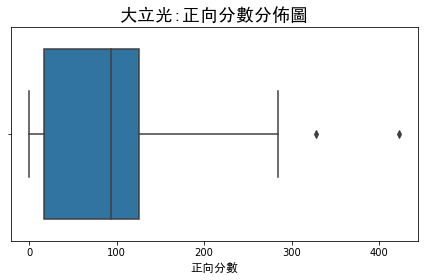

In [22]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_pos_score)
all_news_pos_score.describe()
plt.title('大立光:正向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('正向分數',fontproperties=font,fontsize=12)

plt.savefig('大立光:正向分數分佈圖.png',tight_layout=True)



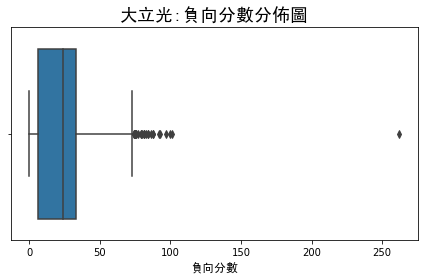

In [23]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_neg_score)
all_news_neg_score.describe()
plt.title('大立光:負向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('負向分數',fontproperties=font,fontsize=12)

plt.savefig('大立光:負向分數分佈圖.png',tight_layout=True)




### 發現df卡方 x tf-idf 會表現最好

因此輸出重要的正負向情緒字各1000個

In [24]:
fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/大立光_token_2000.txt", "w")
 
# 寫入 all_tokens 到檔案
for token in final_positive_token:
    fp.writelines(token)
    fp.writelines('\n')
# 關閉檔案
fp.close()

fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/大立光_token_2000.txt", "a")

for token in final_negative_token:
    fp.writelines(token)
    fp.writelines('\n')

fp.close()

### 在還沒有斷詞斷乾淨前，就姑且以「df卡方 x tf-idf」這個標準挑選前500個詞來給每篇文章正面和負面分數

In [25]:
positive_score = all_news_count_pos[final_positive_token].sum(axis = 1)
negative_score  = all_news_count_neg[final_negative_token].sum(axis = 1)
TSMC_NEWS['positive_score'] = positive_score
TSMC_NEWS['negative_score'] = negative_score
TSMC_NEWS['emotional_score'] = TSMC_NEWS['positive_score'] - TSMC_NEWS['negative_score']

In [26]:
TSMC_NEWS[TSMC_NEWS['status']==1]['emotional_score'].describe()

count    485.000000
mean      86.107216
std       38.709728
min        0.000000
25%       61.000000
50%       89.000000
75%      112.000000
max      236.000000
Name: emotional_score, dtype: float64

In [27]:
TSMC_NEWS[TSMC_NEWS['status']==0]['emotional_score'].describe()

count    2183.000000
mean       57.306917
std        42.285282
min       -17.000000
25%         2.000000
50%        63.000000
75%        89.000000
max       188.000000
Name: emotional_score, dtype: float64

In [28]:
TSMC_NEWS[TSMC_NEWS['status']==-1]['emotional_score'].describe()

count    237.000000
mean      33.059072
std       37.167348
min      -19.000000
25%        0.000000
50%       25.000000
75%       61.000000
max      161.000000
Name: emotional_score, dtype: float64

有了每天文章的分數，再來就是要和股價呼應了，每日股價都應該會有一排該日所有文章的「情緒分數」

In [29]:
TSMC_PRICE.rename(columns={'日期':'TIME'}, inplace=True)

In [30]:
TSMC_PRICE

,TIME,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,status
0,2018-03-01,859927.0,3.297706e+09,3710.0,3920.0,3700.0,3900.0,205.0,"1,059",0
1,2018-03-02,513175.0,1.982831e+09,3850.0,3900.0,3835.0,3870.0,-30.0,589,0
2,2018-03-05,717682.0,2.674893e+09,3860.0,3860.0,3675.0,3700.0,-170.0,920,-1
3,2018-03-06,1081391.0,3.997475e+09,3715.0,3750.0,3655.0,3655.0,-45.0,"1,302",0
4,2018-03-07,725611.0,2.638466e+09,3620.0,3690.0,3600.0,3690.0,35.0,988,0
...,...,...,...,...,...,...,...,...,...,...
511,2019-10-25,424584.0,1.852360e+09,4370.0,4420.0,4335.0,4350.0,-80.0,515,0
512,2019-10-28,306969.0,1.336486e+09,4380.0,4395.0,4330.0,4330.0,-20.0,493,0
513,2019-10-29,434712.0,1.881786e+09,4380.0,4385.0,4285.0,4315.0,-15.0,489,0
514,2019-10-30,391612.0,1.689489e+09,4325.0,4340.0,4290.0,4320.0,5.0,536,0


In [31]:
TSMC_NEWS['TIME'] =  pd.to_datetime(TSMC_NEWS['TIME'], format='%Y/%m/%d')
TSMC_PRICE['TIME'] =  pd.to_datetime(TSMC_PRICE['TIME'], format='%Y/%m/%d')


由於今天的新聞，你只能獲得前n天的股價資訊，而不會得知「當天的」任何市場資訊  
因此我在處理該篇新聞的其他衍生數據時，要concat的是前幾天的股市資訊  

In [32]:
mylist = ['d','v','b']
m = '1'
mylist = list(map(lambda x:x+m,mylist))
mylist

['d1', 'v1', 'b1']

In [33]:
import time
from datetime import datetime, date, time, timedelta
def time_shift(df,n):
    df = df.set_index('TIME')
    df = df.shift(n)
    df = df.reset_index()
    return df
    
TSMC_PRICE_d1 = time_shift(TSMC_PRICE,1)
TSMC_PRICE_d2 = time_shift(TSMC_PRICE,2)
TSMC_PRICE_d3 = time_shift(TSMC_PRICE,3)
# temp1 = pd.merge(TSMC_PRICE_d1,TSMC_PRICE_d2,how = 'inner',on='TIME')
# temp2 = pd.merge(temp1,TSMC_PRICE_d3,how = 'inner',on='TIME')
# TSMC_PRICE = temp2

In [34]:
TSMC_PRICE_d1.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d2.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d3.drop(columns = ['status','TIME'],inplace = True)
output = pd.concat([TSMC_PRICE_d1,TSMC_PRICE_d2,TSMC_PRICE_d3],axis = 1)


In [35]:
output.columns = ['成交股數_d1','成交金額_d1','開盤價_d1','最高價_d1','最低價_d1','收盤價_d1','漲跌價差_d1','成交筆數_d1',
                  '成交股數_d2','成交金額_d2','開盤價_d2','最高價_d2','最低價_d2','收盤價_d2','漲跌價差_d2','成交筆數_d2',
                 '成交股數_d3','成交金額_d3','開盤價_d3','最高價_d3','最低價_d3','收盤價_d3','漲跌價差_d3','成交筆數_d3']
# output['成交筆數_d1'] = output['成交筆數_d1'].apply(lambda x: x.replace(',',''))

output['TIME'] = TSMC_PRICE['TIME']
output['status'] = TSMC_PRICE['status']

In [36]:
output.head()

,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,成交股數_d3,成交金額_d3,開盤價_d3,最高價_d3,最低價_d3,收盤價_d3,漲跌價差_d3,成交筆數_d3,TIME,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-01,0
1,859927.0,3.297706e+09,3710.0,3920.0,3700.0,3900.0,205.0,"1,059",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-02,0
2,513175.0,1.982831e+09,3850.0,3900.0,3835.0,3870.0,-30.0,589,859927.0,3.297706e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-05,-1
3,717682.0,2.674893e+09,3860.0,3860.0,3675.0,3700.0,-170.0,920,513175.0,1.982831e+09,...,859927.0,3.297706e+09,3710.0,3920.0,3700.0,3900.0,205.0,"1,059",2018-03-06,0
4,1081391.0,3.997475e+09,3715.0,3750.0,3655.0,3655.0,-45.0,"1,302",717682.0,2.674893e+09,...,513175.0,1.982831e+09,3850.0,3900.0,3835.0,3870.0,-30.0,589,2018-03-07,0


每篇新聞都有emotional score了，但是每天的emotional score集合  
對每天的股市估算出一個average_emotional_score  
但後來也沒用到  

In [37]:
emotional_score ={}
positive_score = {}
negative_score = {}

for i in output['TIME']:
    try:
        emotional_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['emotional_score'].mean()
        positive_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['positive_score'].mean()
        negative_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['negative_score'].mean()
        
    except :
        emotional_score[i] = 0
        positive_score[i] = 0
        negative_score[i] = 0
emotional_score = pd.DataFrame.from_dict(emotional_score,orient='index').reset_index()
emotional_score.columns=['TIME','emotional_score']
emotional_score['emotional_score_d1'] = emotional_score.emotional_score.shift(1) #因為只能給今天看到前n天的資訊，故要shift(n)
emotional_score['emotional_score_d2'] = emotional_score.emotional_score.shift(2) 
emotional_score['emotional_score_d3'] = emotional_score.emotional_score.shift(3) 
emotional_score.drop(columns=['emotional_score'],inplace = True) 

positive_score = pd.DataFrame.from_dict(positive_score,orient='index').reset_index()
positive_score.columns=['TIME','positive_score']
positive_score['positive_score_d1'] = positive_score.positive_score.shift(1)
positive_score['positive_score_d2'] = positive_score.positive_score.shift(2)
positive_score['positive_score_d3'] = positive_score.positive_score.shift(3)
positive_score.drop(columns=['positive_score'],inplace = True) 

negative_score = pd.DataFrame.from_dict(negative_score,orient='index').reset_index()
negative_score.columns=['TIME','negative_score']
negative_score['negative_score_d1'] = negative_score.negative_score.shift(1)
negative_score['negative_score_d2'] = negative_score.negative_score.shift(2)
negative_score['negative_score_d3'] = negative_score.negative_score.shift(3)
negative_score.drop(columns=['negative_score'],inplace = True) 


temp1 = pd.merge(output,emotional_score,how='inner',on=['TIME'])
temp2 = pd.merge(temp1,positive_score,how='inner',on=['TIME'])
temp3 = pd.merge(temp2,negative_score,how='inner',on=['TIME'])
temp3     


,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,status,emotional_score_d1,emotional_score_d2,emotional_score_d3,positive_score_d1,positive_score_d2,positive_score_d3,negative_score_d1,negative_score_d2,negative_score_d3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,859927.0,3.297706e+09,3710.0,3920.0,3700.0,3900.0,205.0,"1,059",NaN,NaN,...,0,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
2,513175.0,1.982831e+09,3850.0,3900.0,3835.0,3870.0,-30.0,589,859927.0,3.297706e+09,...,-1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
3,717682.0,2.674893e+09,3860.0,3860.0,3675.0,3700.0,-170.0,920,513175.0,1.982831e+09,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1081391.0,3.997475e+09,3715.0,3750.0,3655.0,3655.0,-45.0,"1,302",717682.0,2.674893e+09,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,735346.0,3.199564e+09,4330.0,4430.0,4265.0,4430.0,120.0,827,496204.0,2.149151e+09,...,0,79.500000,82.888889,81.888889,110.500000,107.444444,111.888889,31.000000,24.555556,30.000000
512,424584.0,1.852360e+09,4370.0,4420.0,4335.0,4350.0,-80.0,515,735346.0,3.199564e+09,...,0,79.777778,79.500000,82.888889,107.777778,110.500000,107.444444,28.000000,31.000000,24.555556
513,306969.0,1.336486e+09,4380.0,4395.0,4330.0,4330.0,-20.0,493,424584.0,1.852360e+09,...,0,58.500000,79.777778,79.500000,87.500000,107.777778,110.500000,29.000000,28.000000,31.000000
514,434712.0,1.881786e+09,4380.0,4385.0,4285.0,4315.0,-15.0,489,306969.0,1.336486e+09,...,0,109.166667,58.500000,79.777778,146.000000,87.500000,107.777778,36.833333,29.000000,28.000000


把結果輸出成新的NEWS和新的price

In [38]:
TSMC_NEWS.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的新聞/LARGAN_NEWS.csv',index=None)
temp3.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的股價/LARGAN_Stock.csv',index=None)


剩下的我們到建模型那塊再講吧

### 將斷詞的詞寫入txt

In [ ]:
# all_tokens = list(TSMCtext.sort_values(by = 'MI',ascending=False).index)

# # fp = open("/Users/liaoshousan/Desktop/RLSD_PROJECT-StockPrice Prediction/斷出來的詞/tokenize_result_Largan.txt", "a")
 
# # 寫入 all_tokens 到檔案
# for token in all_tokens:
#     fp.writelines(token)
#     fp.writelines('\n')
    
 
# # 關閉檔案
# fp.close()